# 강수량 fbporphet 1

In [ ]:
pip install fbprophet # 프로펫 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd # 판다스
df = pd.read_csv('/content/전국월병강수량73-20.csv', encoding='cp949') # 데이터 로드

In [ ]:
df.head()

,시간,강수량(mm)
0,1973년01월,71.8
1,1973년02월,21.1
2,1973년03월,9.9
3,1973년04월,134.4
4,1973년05월,148.1


In [ ]:
df = df.rename(columns={'시간':'time', '강수량(mm)':'percipitation'})
df.tail() # 이름 바꿔줬다

,time,percipitation
571,2020년08월,420.8
572,2020년09월,219.1
573,2020년10월,10.5
574,2020년11월,40.8
575,2020년12월,7.8


In [ ]:
df["time"] = df["time"].str.replace(pat=r'년', repl=r'-', regex=True) # 한글 지워줬다

In [ ]:
df["time"] = df["time"].str.replace(pat=r'월', repl=r'', regex=True) # 한글 지워줬다

In [ ]:
df.head()

,time,percipitation
0,1973-01,71.8
1,1973-02,21.1
2,1973-03,9.9
3,1973-04,134.4
4,1973-05,148.1


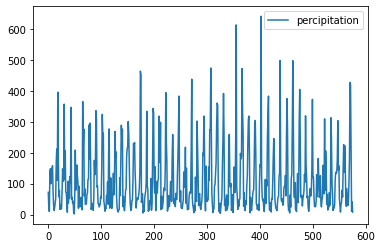

In [ ]:
from matplotlib import pyplot # 맷플롯립으로 온도를 그려봤다
df.plot()
pyplot.show() # 이쁘다

In [ ]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds']) # 프로펫은 변수 이름을 ds, y 로 맞춰줘야 한단다

In [ ]:
from fbprophet import Prophet # 프로펫
model = Prophet() # 이제부터 너는 모델이다

In [ ]:
model.fit(df) # 학습

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
last_1year = list() # 마지막 년도인 2020년의 12개의 달을 모으려고 한다 
for i in range(1, 13):
  last_1year.append(['2020-%02d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds'] = pd.to_datetime(last_1year['ds']) # 남에 꺼 따라했다

# 미래나 과거를 예측해보기 전 학습으로 사용한 데이터를 잘 예측하는지 확인해야 한단다
# in_sample_forecast라고 한다는데, 즉 train_set을 잘 예측하냐 보는거다

In [ ]:
forecast = model.predict(last_1year) # 모은 2020년을 예측해보라 하고 forecast에 저장했다

In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()) 
# 뭐가 많은데 4가지 컬럼만 보겠다

          ds        yhat  yhat_lower  yhat_upper
0 2020-01-01   30.422441  -51.797426  108.237644
1 2020-02-01   38.308389  -45.371397  122.250499
2 2020-03-01   59.928563  -19.849613  139.337343
3 2020-04-01   98.551492   10.809490  175.932032
4 2020-05-01  104.579833   17.337184  185.578305


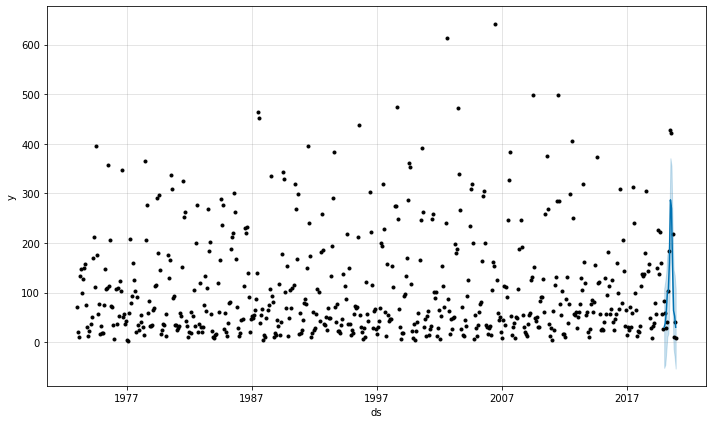

In [ ]:
model.plot(forecast)
pyplot.show()
# 프로펫은 내장함수 plot()가 있어서 좋다
# 검은점은 실제 데이터고 파란선이 예측값인데 엄청 잘 맞춘듯

In [ ]:
last_1year1 = list() # 이번엔 임의의 날짜 2021년 12달을 만든다
for i in range(1, 13):
  last_1year1.append(['2021-%02d' % i])
last_1year1 = pd.DataFrame(last_1year1, columns = ['ds'])
last_1year1['ds'] = pd.to_datetime(last_1year1['ds'])

# out_of_sample_forecast라고 한다는데, 그냥 21년 예측하는거다

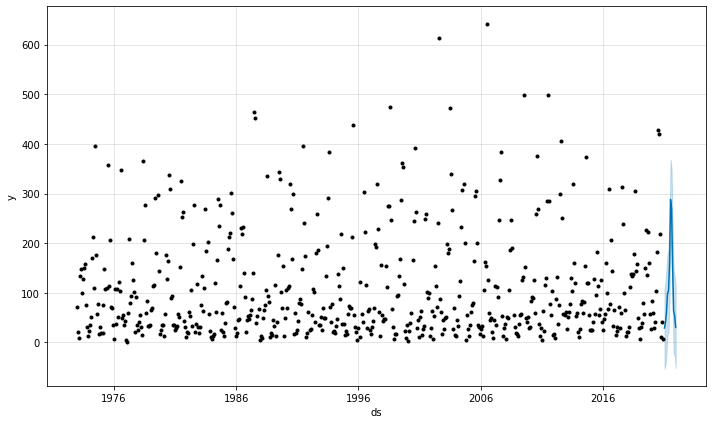

In [ ]:
forecast1 = model.predict(last_1year1)
model.plot(forecast1)
pyplot.show()
# 대충 잘 맞춘듯, 점이 많으니까 그냥 용과같아서 이쁘다

In [ ]:
# 이번에는 다르게 마지막 1년을 제외한 값으로 학습을 하고 마지막 1년을 예측한 뒤 
# 실제 마지막 1년과 비교하려고 한다 

# 마지막 12개월 제외시키기 
train = df.drop(df.index[-12:]) # train에서 뒤에 12개 제외
y_true = df['y'][-12:].values # 제외한 값은 y_true로 저장해둔다

# 모델 생성 후 학습
model = Prophet()
model.fit(train) # 12개가 빠진 train으로 학습

# 가상의 마지막 12개월 생성
last_1year = list()
for i in range(1, 13):
  last_1year.append(['2020-%02d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds'] = pd.to_datetime(last_1year['ds']) # 실제 값이 들은게 아니다 !

# 예측, 비교하기 그리고 MAE를 살펴보기
forecast = model.predict(last_1year)
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE: 54.349


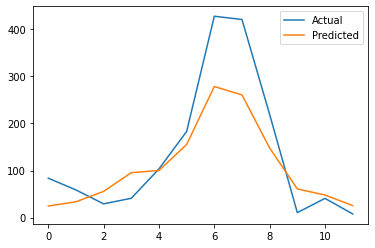

In [ ]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()
# MAE 54.349 잘 맞춘 듯 하다

In [ ]:
forecast1['yhat'] # 아까 했던 2021년 월별 강수량 예측

In [ ]:
data2021 = [19.9, 20.1, 110.7, 76.3, 143.8, 91.6, 233.8, 288.4, 145.8, 53.9, 58, 7.2] 
# 2021년 월별 강수량
# https://data.kma.go.kr/stcs/grnd/grndRnList.do?pgmNo=69

In [ ]:
pyplot.plot(data2021, label='Actual')
pyplot.plot(forecast1['yhat'], label='Predicted')
pyplot.legend()
pyplot.show()